<a href="https://colab.research.google.com/github/laggywiggl/RAG-with-LLM/blob/main/Test_the_Finetuned_GPT2_AND_Llama2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

1. [Introduction](#introduction)
2. [Environment Setup](#environment-setup)
    1. [Importing Libraries](#importing-libraries)
3. [Setting Configuration](#setting-configuration)
4. [Model Loading](#model-loading)
5. [Input Preparation](#input-preparation)
6. [Model Inference](#model-inference)
7. [Result Interpretation](#result-interpretation)
8. [Conclusion](#conclusion)





## Introduction
<a id="introduction"></a>


This notebook demonstrates the process of setting up an environment, loading a teh fintuned models, preparing input, performing model inference, and interpreting results.

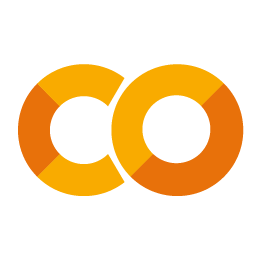

This notebook is designed to run on Google Colab, making it easy to use and share.



# Environment Setup
<a id="environment-setup"></a>

Ensure all required packages are installed for running the notebook.




In [ ]:
!pip install "transformers==4.35" "datasets==2.13.0" "peft==0.4.0" "accelerate==0.21.0" "bitsandbytes==0.40.2" "trl==0.4.7" "safetensors>=0.3.1" "tiktoken"

## Importing Libraries
<a id="Importing Libraries"></a>

Import necessary libraries for model loading, configuration, and inference.





In [ ]:
import pandas as pd
import torch
from datasets import Dataset, load_dataset
from random import randrange
from peft import LoraConfig, get_peft_model, AutoPeftModelForCausalLM
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, TrainingArguments
from trl import SFTTrainer

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


# Setting Configuration
<a id="setting-configuration"></a>
Set the configuration for the model, including the computation type and BitsAndBytes configuration for 4-bit quantization.

In [ ]:
import torch
from transformers import BitsAndBytesConfig

# Get the type
compute_dtype = getattr(torch, "float16")

# BitsAndBytesConfig int-4 config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=False,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=compute_dtype
)

# Model Loading
<a id="model-loading"></a>
Load the pre-trained model and tokenizer from the specified Hugging Face repository.

notice : delete comment to use one of the Fintuned models

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
#hf_model_repo = "laggywiggl/llama2FT_qna"
hf_model_repo = "laggywiggl/GPT2modelFT"

# Get the tokenizer
tokenizer = AutoTokenizer.from_pretrained(hf_model_repo)

# Load the model
model = AutoModelForCausalLM.from_pretrained(hf_model_repo,
                                             quantization_config=bnb_config,
                                             device_map="auto")

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(



# Input Preparation
<a id="input-preparation"></a>

Prepare the input prompt for the model inference.

In [ ]:

prompt = "Prompt :what are my responsibilities as an intern in the SDA team ?\n\nAnswer:\n"


# Model Inference
<a id="model-inference"></a>

This cell generates a response using the pre-trained model. It involves tokenizing the prompt, generating the output with specific parameters (like max_new_tokens and temperature), and decoding the result. Finally, the generated response is printed.

In [ ]:
# Generate response
%%time
input_ids = tokenizer(prompt, return_tensors="pt", truncation=True).input_ids
outputs = model.generate(input_ids=input_ids,
                         max_new_tokens=250,
                         temperature=0.6)

result = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]

# Print the result
print(f"Generated response:\n{result}")


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated response:
Prompt :what are my responsibilities as an intern in the SDA team?

Answer:
:I am responsible for running the SDA team's projects, assisting clients, interns, and employees, ensuring they have a smooth and informative experience. I also manage project progress and coordinate team activities. I serve on several different levels, including technical pilots, engineers, and other senior officials. I serve on various departments including product development, EE architecture, and mechanical engineering. I also serve on various key technical panels and meet with stakeholders to discuss technical issues or solutions. I encourage everyone to participate in my discussions and encourage others to do the same.
: What are the main responsibilities of the SDA team's members, including design and analysis?
: The SDA team's main responsibilities are to ensure the quality and functionality of their products and services, to ensure they meet the specific needs of the market, and to 


# Result Interpretation
<a id="result-interpretation"></a>


## Response analysis
 - The prompt asks: "What are my responsibilities as an intern in the SDA team?"
 - The generated answer includes responsibilities like running projects, assisting clients and team members, managing project progress, and participating in various technical panels.
 - This response covers a broad range of tasks, showing a good understanding of typical intern responsibilities in a technical team.
 - The response seems comprehensive and well-structured, reflecting the key duties expected from an intern in such a setting.

# Conclusion
<a id="conclusion"></a>

- In this notebook, we demonstrated how to set up the environment, load a fine-tuned model (with options to choose between LLaMA2 and GPT-2), prepare the prompt question, perform inference, and analyze the results.
- The model used was GPT-2, fine-tuned on our custom data. It is important to note that there is sometimes a risk of hallucination since the data was not sufficient.
- The generated responses were evaluated and found to be relevant and comprehensive if the input is well-written.
- Future work could include further fine-tuning the model with more extensive domain-specific data to improve performance and mitigate hallucinations.
